In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%cd ../..

/scratch/km817/iREC


In [4]:
import torch
import torch.distributions as dist
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from rec.utils import kl_estimate_with_mc, plot_running_sum_2d, plot_2d_distribution, kl_estimate_with_mc, compute_variational_posterior
from tqdm.notebook import trange
#import seaborn as sns; sns.set(); sns.set_style('whitegrid')
import math
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
plt.rcParams.update({'font.weight': 'normal'})
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth' : 2})

In [6]:
torch.set_default_tensor_type(torch.DoubleTensor)

In [7]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser

In [8]:
torch.manual_seed(100)

qs = []
ps = []
dims = [1, 5, 10, 25, 50, 75, 100]
for d in dims:
    rand_mat = torch.rand(size=(d,d))
    qs.append(dist.MultivariateNormal(loc= torch.ones(size=(d,)), covariance_matrix = torch.eye(d)))
    ps.append(dist.MultivariateNormal(loc=torch.zeros((d,)), covariance_matrix = torch.eye(d)))

In [18]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser

In [19]:
coding_sampler = CodingSampler
auxiliary_posterior = VariationalPosterior
selection_sampler = GreedySampler

In [20]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
initial_seed = initial_seed
var_times = []
for q in qs:

    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)
    
    #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    var_time = %timeit -o enc.run_encoder()
    var_times.append(var_time)

814 µs ± 163 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
873 µs ± 725 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
911 µs ± 203 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.51 ms ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.5 ms ± 8.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
70.7 ms ± 684 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
159 ms ± 594 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
from rec.beamsearch.Coders.Encoder import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.EmpiricalMixturePosterior import EmpiricalMixturePosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler

In [22]:
coding_sampler = CodingSampler
auxiliary_posterior = EmpiricalMixturePosterior
selection_sampler = GreedySampler

In [23]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1.
initial_seed = initial_seed
emp_times_1 = []
for q in qs:
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=1,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)

        #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    emp_time = %timeit -o enc.run_encoder()
    emp_times_1.append(emp_time)

828 µs ± 513 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
886 µs ± 405 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
923 µs ± 309 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.48 ms ± 4.54 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.3 ms ± 6.69 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
35.2 ms ± 64.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
72 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
emp_times_1[0].stdev

5.133230643105776e-07

In [25]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1.
initial_seed = initial_seed
emp_times_10 = []
for q in qs:
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=10,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)

        #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    emp_time = %timeit -o enc.run_encoder()
    emp_times_10.append(emp_time)

829 µs ± 560 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
887 µs ± 417 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
924 µs ± 325 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8.05 ms ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
53.2 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
252 ms ± 4.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
587 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1.
initial_seed = initial_seed
emp_times_100 = []
for q in qs:
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=100,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)

        #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    emp_time = %timeit -o enc.run_encoder()
    emp_times_100.append(emp_time)

830 µs ± 413 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
898 µs ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
925 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
41.6 ms ± 800 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
479 ms ± 8.31 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.16 s ± 49.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.48 s ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
alpha = 1.
initial_seed = initial_seed
emp_times_1000 = []
for q in qs:
    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 n_samples_from_target=1000,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)

        #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    emp_time = %timeit -o enc.run_encoder()
    emp_times_1000.append(emp_time)

1 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
937 µs ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
920 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
389 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.5 s ± 27.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
19.3 s ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
50.5 s ± 860 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
for q, p in zip(qs, ps):
    print(dist.kl_divergence(q, p))

tensor(0.5000)
tensor(2.5000)
tensor(5.)
tensor(12.5000)
tensor(25.)
tensor(37.5000)
tensor(50.)


In [37]:
var_mean_times = np.array([t.average for t in var_times])
emp_1_mean_times = [t.average for t in emp_times_1]
emp_10_mean_times = [t.average for t in emp_times_10]
emp_100_mean_times = [t.average for t in emp_times_100]
emp_1000_mean_times = [t.average for t in emp_times_1000]

emp_mean_times = np.array([emp_1_mean_times, emp_10_mean_times, emp_100_mean_times, emp_1000_mean_times])

In [40]:
var_std_times = np.array([t.stdev for t in var_times])
emp_1_std_times = [t.stdev for t in emp_times_1]
emp_10_std_times = [t.stdev for t in emp_times_10]
emp_100_std_times = [t.stdev for t in emp_times_100]
emp_1000_std_times = [t.stdev for t in emp_times_1000]

emp_std_times = np.array([emp_1_std_times, emp_10_std_times, emp_100_std_times, emp_1000_std_times])

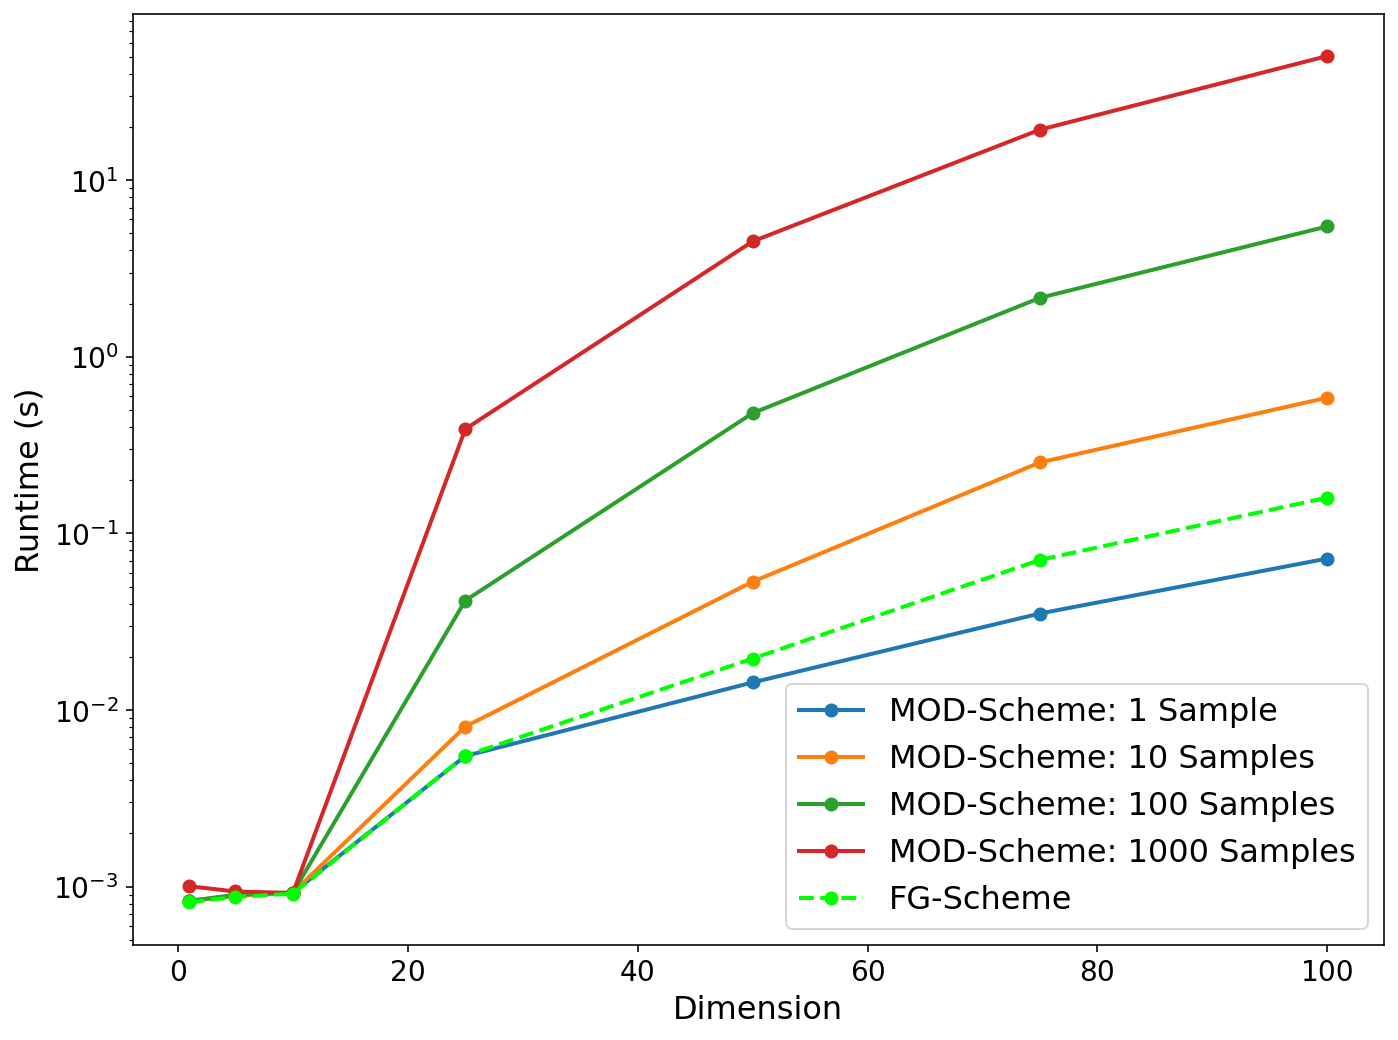

In [46]:
f, ax = plt.subplots(figsize=(10, 7.5))
fs = 16
for times, stds in zip(emp_mean_times, emp_std_times):
    ax.plot(dims, times, 'o-')
    #ax.fill_between(dims, times + stds * 2, times - stds * 2, alpha=0.25)
    ax.set_yscale('log')
ax.plot(dims, var_mean_times, 'o--', color='lime')
#ax.fill_between(dims, var_mean_times + var_std_times * 2, var_mean_times - var_std_times * 2, alpha=0.25, color='lime')
ax.set_xlabel('Dimension', fontsize=fs)
ax.set_ylabel('Runtime (s)', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.tick_params(axis='both', which='minor', labelsize=fs-2)
ax.legend(['MOD-Scheme: 1 Sample', 'MOD-Scheme: 10 Samples', 'MOD-Scheme: 100 Samples', 'MOD-Scheme: 1000 Samples', 'FG-Scheme'], fontsize=fs)
f.tight_layout()
f.savefig("Figures/Thesis/Var_vs_Emp_runtimes.pdf", bbox_inches='tight')